In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [3]:
auto = pd.read_csv('CarPrice_Assignment.csv')
auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### `No null values found for the dataset`

### Data Clean Up - Seggregating Car Company and Model

#### `as we can see there are occurences where the car comany name is misspelled, we will replace it with correct name`

In [5]:
# auto.rename(columns={"CarName":"company"})

auto["CarName"] = auto.CarName.map(lambda x: x.split(" ", 1)[0])

# As we have some redundant data in carName lets fix it 
auto.CarName = auto['CarName'].str.lower()
auto['CarName'] = auto['CarName'].str.replace('vw','volkswagen')
auto['CarName'] = auto['CarName'].str.replace('vokswagen','volkswagen')
auto['CarName'] = auto['CarName'].str.replace('toyouta','toyota')
auto['CarName'] = auto['CarName'].str.replace('porcshce','porsche')
auto['CarName'] = auto['CarName'].str.replace('maxda','mazda')
auto['CarName'] = auto['CarName'].str.replace('maxda','mazda')

auto.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Now we have unique car comapnies

### Now there are 2 ways to proceed
1. we can consider the `Company` as a feature {We will Consider this Scenario}

2. we will consider only car attributes excluding the `Company`

# Step 2: Visualising the Data

#### `Visualising all the Numeric Variables with Pairplot`

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

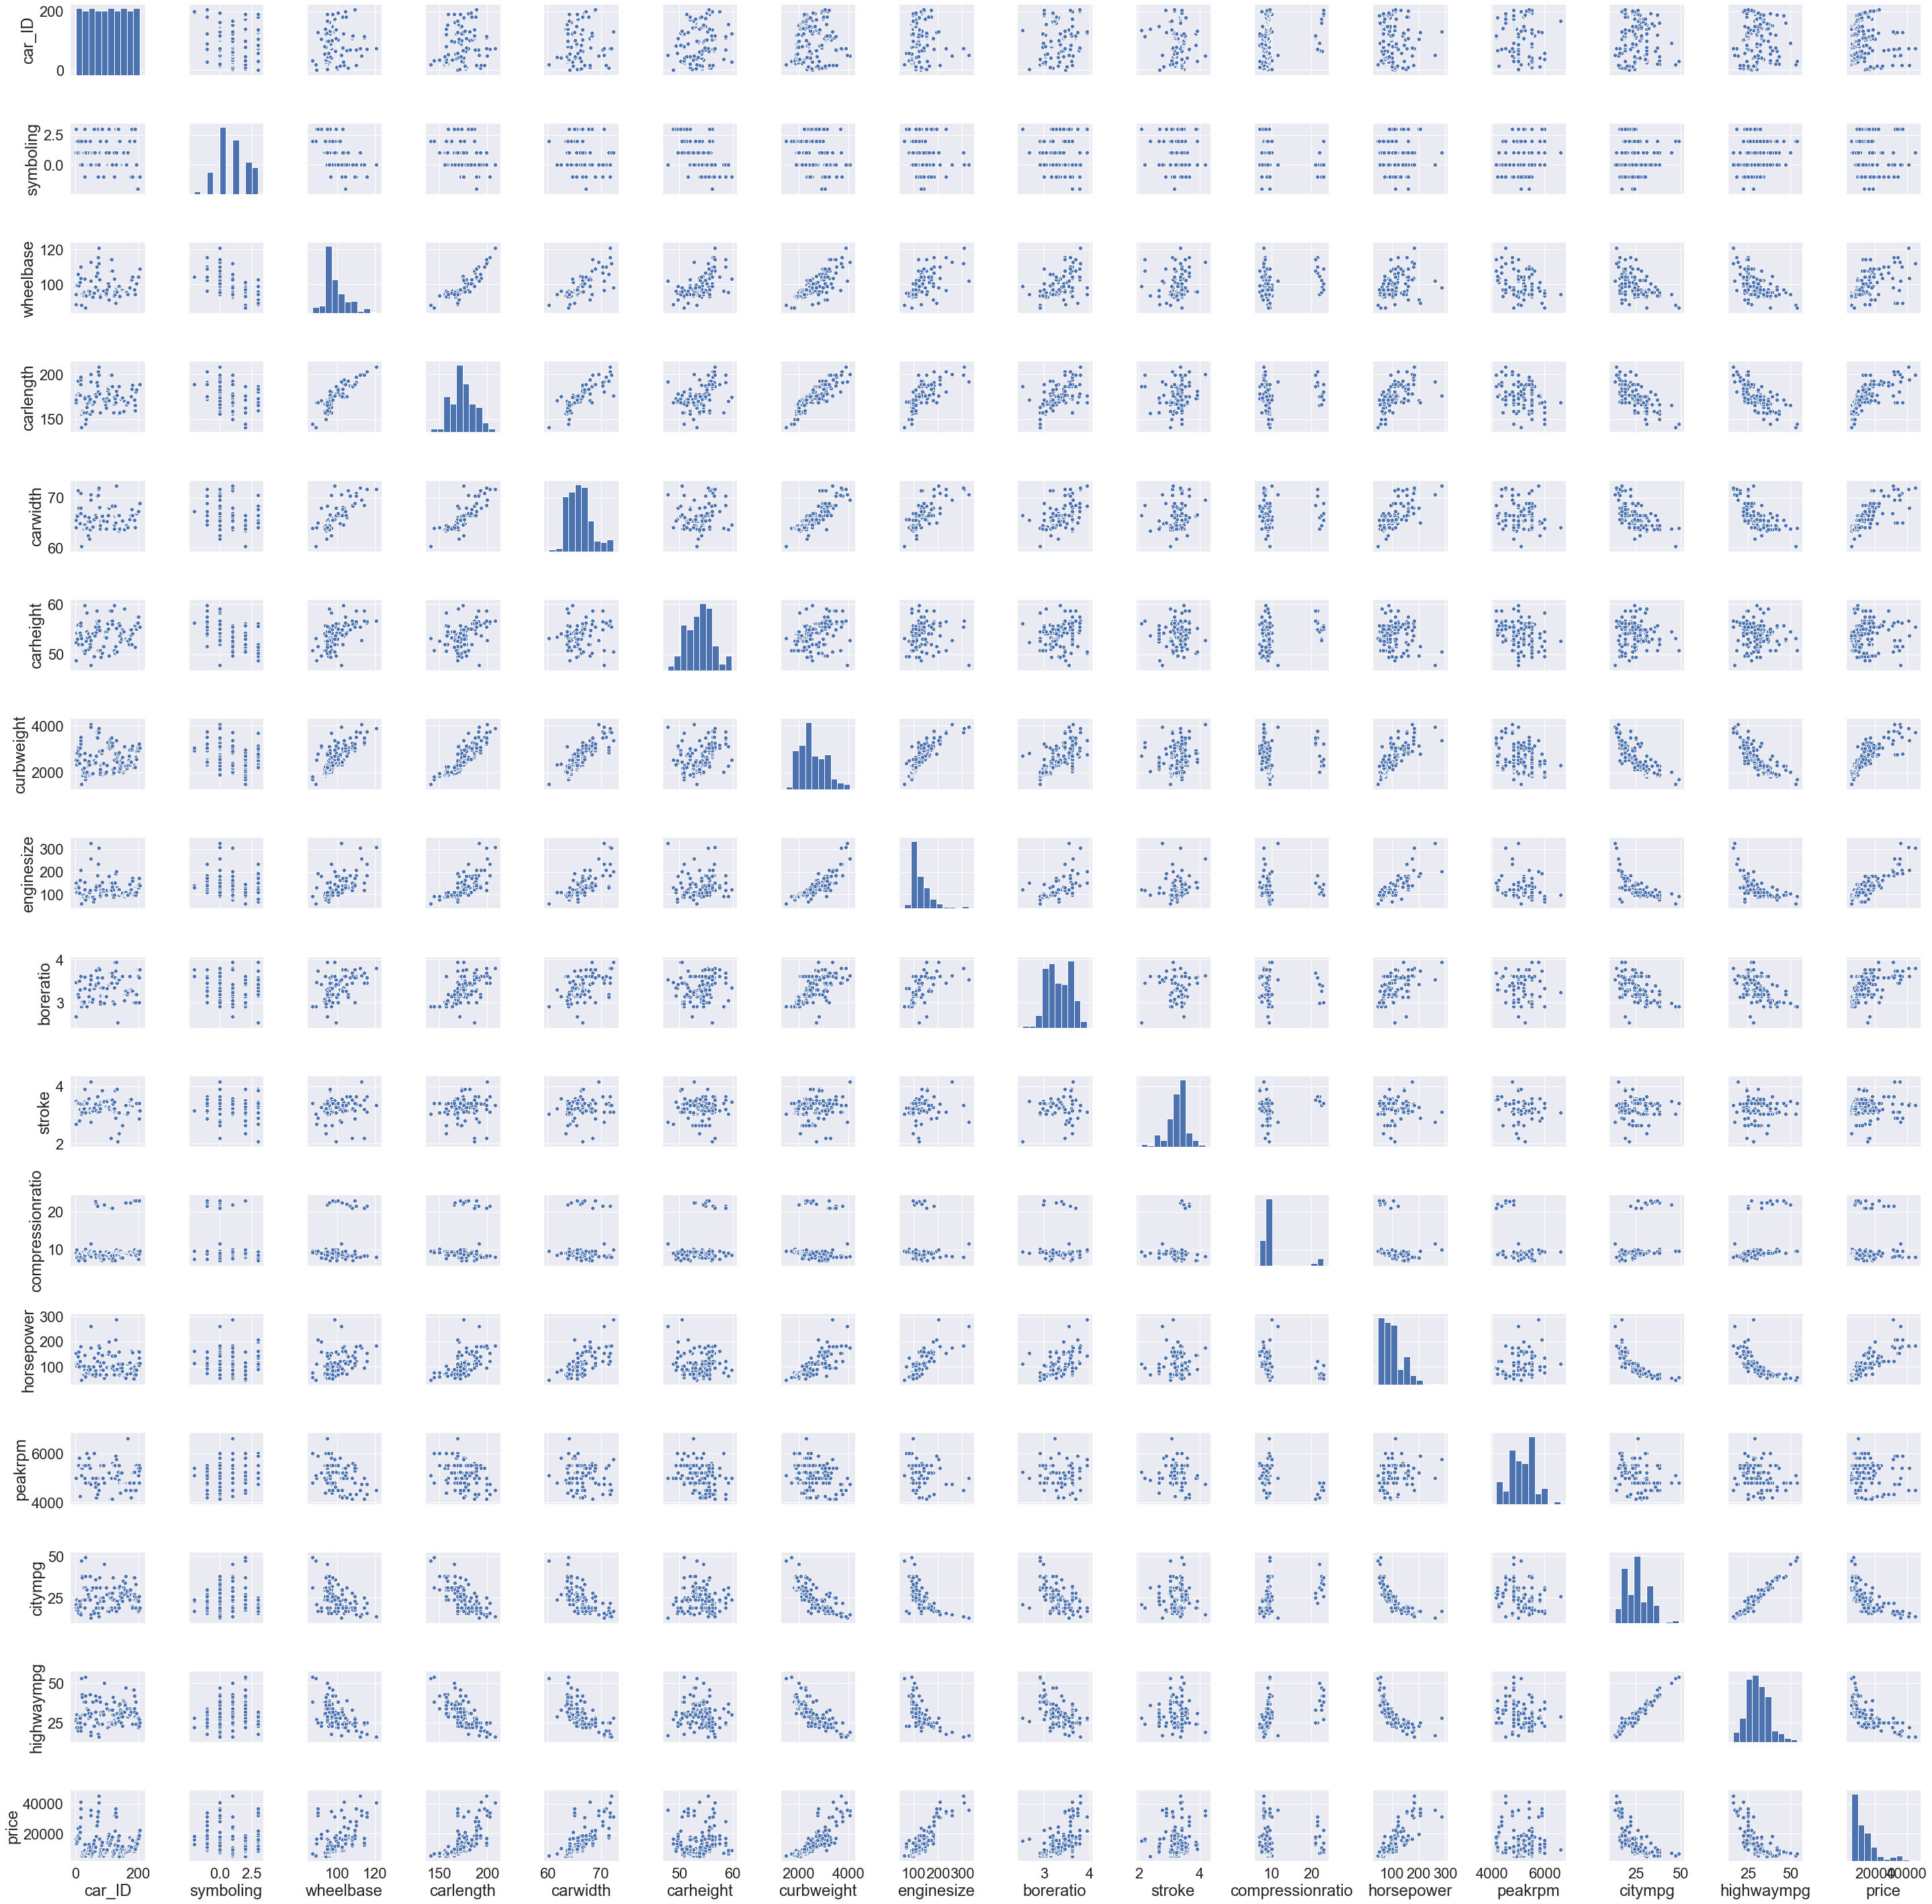

In [7]:
sns.set(font_scale=2)
sns.pairplot(auto)
plt.show()

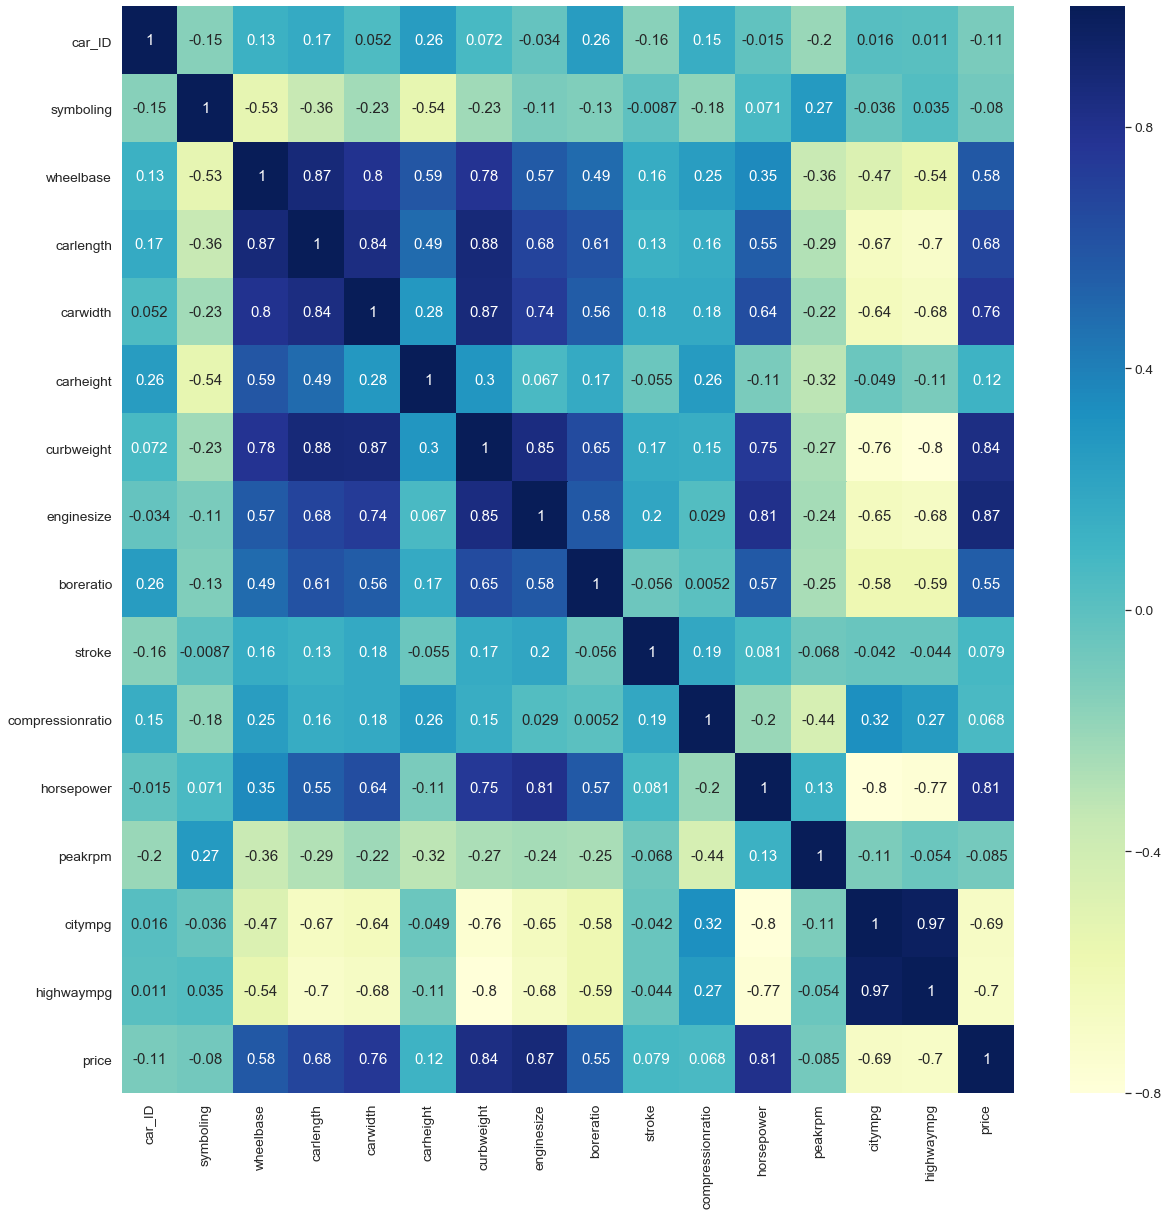

In [8]:
plt.figure(figsize = (20, 20))
sns.set(font_scale=1.25)
sns.heatmap(auto.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Visualising the Categorical Variables

### Price Variation for Different Companies

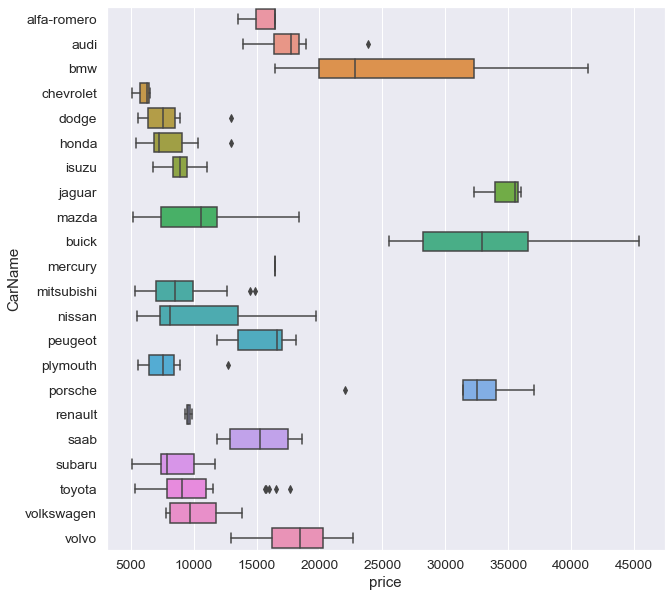

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(y='CarName', x='price', data = auto)

### Price Variation for Car Attributes

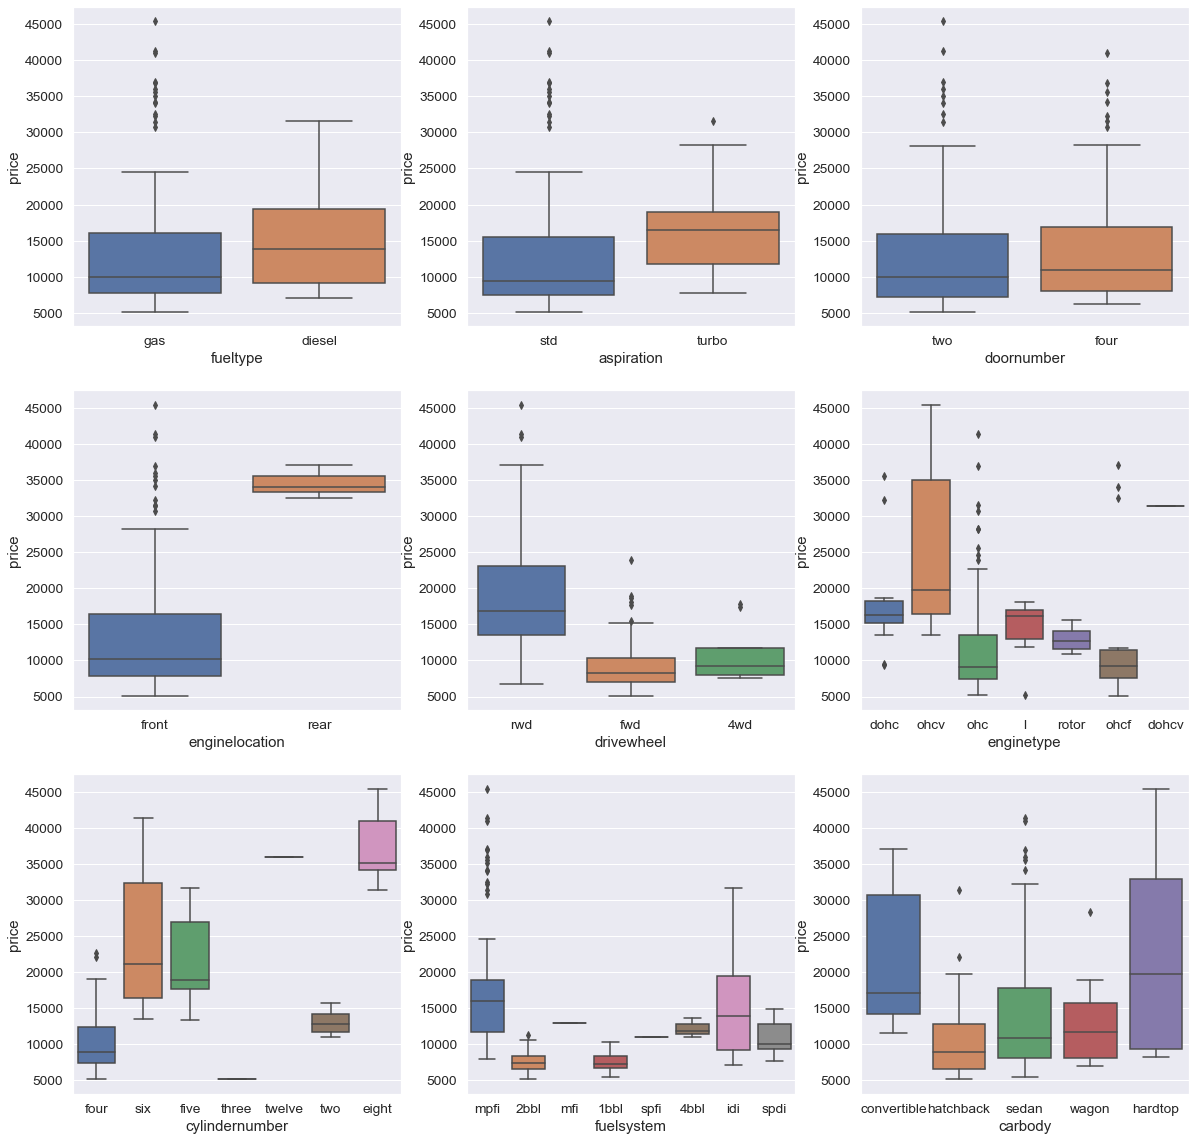

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y='price', data = auto)

plt.subplot(3,3,2)
sns.boxplot(x='aspiration', y='price', data = auto)

plt.subplot(3,3,3)
sns.boxplot(x='doornumber', y='price', data = auto)

plt.subplot(3,3,4)
sns.boxplot(x='enginelocation', y='price', data = auto)

plt.subplot(3,3,5)
sns.boxplot(x='drivewheel', y='price', data = auto)

plt.subplot(3,3,6)
sns.boxplot(x='enginetype', y='price', data = auto)

plt.subplot(3,3,7)
sns.boxplot(x='cylindernumber', y='price', data = auto)

plt.subplot(3,3,8)
sns.boxplot(x='fuelsystem', y='price', data = auto)

plt.subplot(3,3,9)
sns.boxplot(x='carbody', y='price', data = auto)


## Step 3: Data Preparation

Converting Binary variables to Numbers 1,0: `fueltype`, `aspiration`, `doornumber`, `enginelocation`

In [11]:
auto.drop(['car_ID'], axis =1, inplace = True)

In [12]:
# Converting Yes to 1 and No to 0
auto['fueltype'] = auto['fueltype'].map({'gas': 1, 'diesel': 0})
auto['aspiration'] = auto['aspiration'].map({'std': 1, 'turbo': 0})
auto['doornumber'] = auto['doornumber'].map({'two': 1, 'four': 0})
auto['enginelocation'] = auto['enginelocation'].map({'front': 1, 'rear': 0})

In [13]:
auto.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(9), object(6)
memory usage: 33.7

### `Creating Dummy Variables Individually, concating and Dropping the Columns `

In [14]:

# # drivewheel, enginetype, cylindernumber, fuelsystem, carbody

# dummy_drivewheel = pd.get_dummies(auto['drivewheel'], drop_first = True)
# dummy_enginetype = pd.get_dummies(auto['enginetype'], drop_first = True)
# dummy_cylindernumber = pd.get_dummies(auto['cylindernumber'], drop_first = True)
# dummy_fuelsystem = pd.get_dummies(auto['fuelsystem'], drop_first = True)
# dummy_carbody = pd.get_dummies(auto['carbody'], drop_first = True)


# ## Concatenating all the Dummy Variables to the DataFrame

# auto = pd.concat([auto, dummy_drivewheel,dummy_enginetype, dummy_cylindernumber, dummy_fuelsystem, dummy_carbody], axis = 1)


# # Dropping the Columns where Dummy variables have been created
# auto.drop(['drivewheel'],axis = 1, inplace=True)
# auto.drop(['enginetype'],axis = 1, inplace=True)
# auto.drop(['cylindernumber'],axis = 1, inplace=True)
# auto.drop(['fuelsystem'],axis = 1, inplace=True)
# auto.drop(['carbody'],axis = 1, inplace=True)
# auto.head()

### `Creating Dummy Variables all together, concating and Dropping the Columns `

In [15]:
df = pd.get_dummies(auto)
df.columns
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


### Rescaling the the Features using Normalisation

In [16]:
#defining a normalisation function 
cols_to_norm = ['symboling', 'carlength', 'carheight', 
         'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'price']
# Normalising only the numeric fields 
normalised_df = df[cols_to_norm].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
normalised_df.head()

df['symboling'] = normalised_df['symboling']
df['carlength'] = normalised_df['carlength']
df['carheight'] = normalised_df['carheight']
df['enginesize'] = normalised_df['enginesize']
df['boreratio'] = normalised_df['boreratio']
df['stroke'] = normalised_df['stroke']
df['price'] = normalised_df['price']
df['compressionratio'] = normalised_df['compressionratio']
df['horsepower'] = normalised_df['horsepower']
df['peakrpm']= normalised_df['peakrpm']
df['citympg'] = normalised_df['citympg']
df.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,-0.042526,-0.110407,0.094689,-0.464111,0.102184,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,0.038071,0.047927,-0.067575,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,0.038071,0.047927,0.034312,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Spliting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = df.pop('price')
X = df

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
symboling                205 non-null float64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
carlength                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null float64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null float64
peakrpm                  205 non-null float64
citympg                  205 non-null float64
CarName_alfa-romero      205 non-null uint8
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
CarName_dodge            205 non-null u

### `train_test_split` 

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

### `RFE` Recursive Feature Elimination

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()

# Running RFE -Recursive Feature Elimination
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

# Printing the boolean results
print(rfe.support_)           
print(rfe.ranking_)  

[False False False False False  True False  True  True  True False False
 False False False  True  True  True False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False  True False False
 False False  True  True False  True False  True  True  True False False
 False False False False False False]
[49 47  5 24 43  1 16  1  1  1 48 32  4 50 15  1  1  1 22 17 27 29 18 38
 46  6 31  2 14  1 30 10 39 44 33 11  9 36 35 34 37 42 41 25  8  1  3 13
 21  7  1  1 12  1 23  1  1  1 19 28 45 26 51 40 20 52]


In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('fueltype', False, 47),
 ('aspiration', False, 5),
 ('doornumber', False, 24),
 ('enginelocation', False, 43),
 ('carlength', True, 1),
 ('carheight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 48),
 ('horsepower', False, 32),
 ('peakrpm', False, 4),
 ('citympg', False, 50),
 ('CarName_alfa-romero', False, 15),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 22),
 ('CarName_dodge', False, 17),
 ('CarName_honda', False, 27),
 ('CarName_isuzu', False, 29),
 ('CarName_jaguar', False, 18),
 ('CarName_mazda', False, 38),
 ('CarName_mercury', False, 46),
 ('CarName_mitsubishi', False, 6),
 ('CarName_nissan', False, 31),
 ('CarName_peugeot', False, 2),
 ('CarName_plymouth', False, 14),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 30),
 ('CarName_saab', False, 10),
 ('CarName_subaru', False, 39),
 ('CarName_toyota', 

In [23]:
# variables to be dropped
col = X_train.columns[~rfe.support_] 
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa-romero', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_six',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi',

In [24]:
X_train.columns
X_train.drop(col,1, inplace = True)
X_train.columns

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

### Buliding Model by dropping columns after RFE `Top-Down` approach)

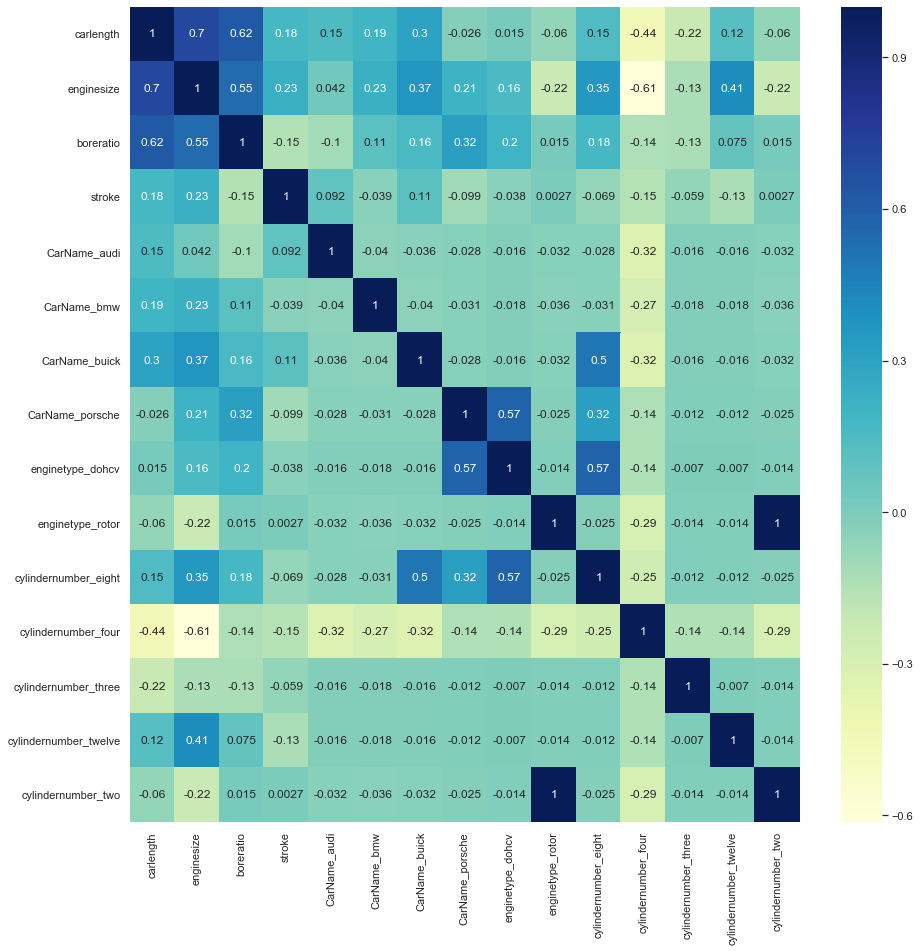

In [25]:
plt.figure(figsize = (15, 15))
sns.set(font_scale=1)
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

## `Model 1`

In [26]:
X_train_1 = X_train

In [27]:
# Add a constant
X_train_1 = sm.add_constant(X_train_1)

# Create Model1
lr1 = sm.OLS(y_train, X_train_1).fit()
print(lr1.params)
print(lr1.summary())

const                   -0.151828
carlength                0.245618
enginesize               1.450557
boreratio               -0.316917
stroke                  -0.238638
CarName_audi             0.185621
CarName_bmw              0.208253
CarName_buick            0.246158
CarName_porsche          0.297058
enginetype_dohcv         0.206396
enginetype_rotor         0.230894
cylindernumber_eight    -0.202655
cylindernumber_four      0.154410
cylindernumber_three     0.311026
cylindernumber_twelve   -0.447271
cylindernumber_two       0.230894
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           8.94e-61
Time:                        10:07:00   Log-Li

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

def calculate_VIF(data_frame):
    vif = pd.DataFrame(columns = ['Features', 'VIF'])
    vif['Features'] = data_frame.columns
    vif['VIF'] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [30]:
# Model1 VIF
calculate_VIF(X_train)

,Features,VIF
9,enginetype_rotor,inf
14,cylindernumber_two,inf
1,enginesize,6.97
0,carlength,3.38
10,cylindernumber_eight,3.13
2,boreratio,2.93
8,enginetype_dohcv,2.51
13,cylindernumber_twelve,2.12
7,CarName_porsche,1.91
6,CarName_buick,1.86


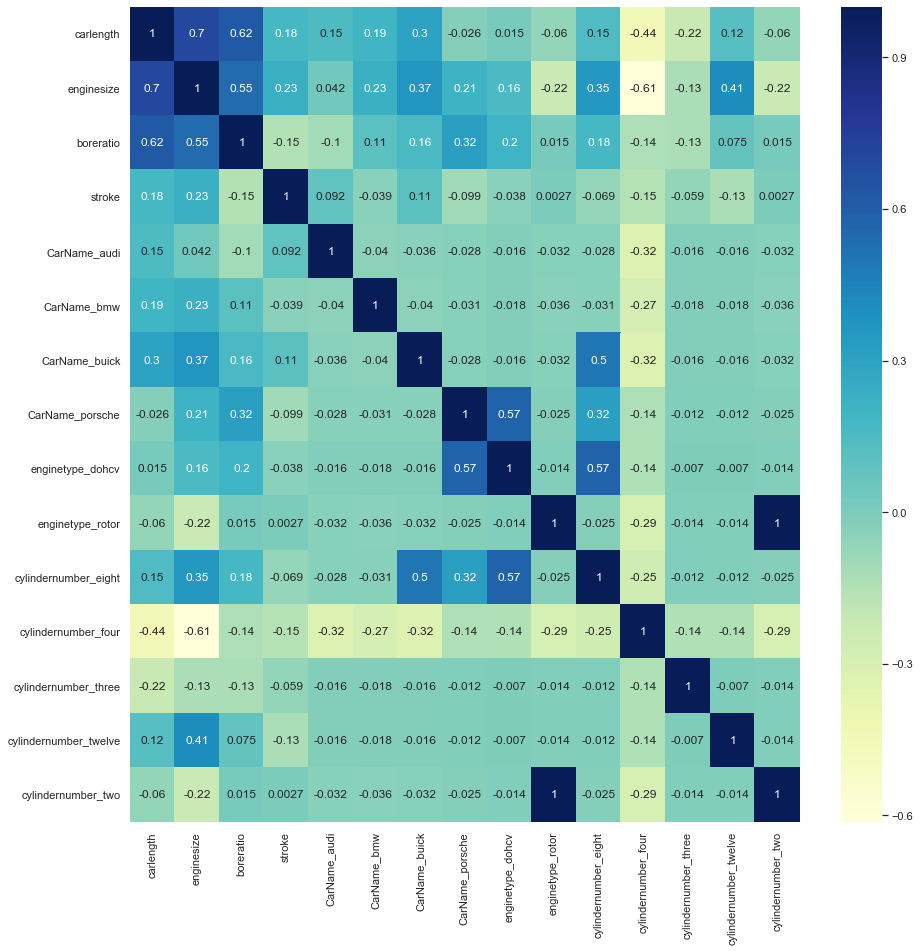

In [31]:
plt.figure(figsize = (15, 15))
sns.set(font_scale=1)
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

####  Dropping highly correlated(VIF) variables and insignificant variables(P-Value)
`Priority of Dropping`
1. High VIF - High P-Value
2. High VIF - Low P-Value
3. Low VIF - High P-Value
4. Retainig the Low VIF and Low P-Value

##  `Model 2 ` 
From heat map the `cylindernumber_two` and `enginetype_rotor` are highly corelated, the corelation is 1.


`enginetype_rotor` is infinity. Drop `enginetype_rotor`

In [32]:
X_train_2 = X_train_1.drop('enginetype_rotor', 1)

# Add a constant
X_train_2 = sm.add_constant(X_train_2)

# Create Model1
lr2 = sm.OLS(y_train, X_train_2).fit()
print(lr2.params)
print(lr2.summary())

const                   -0.151828
carlength                0.245618
enginesize               1.450557
boreratio               -0.316917
stroke                  -0.238638
CarName_audi             0.185621
CarName_bmw              0.208253
CarName_buick            0.246158
CarName_porsche          0.297058
enginetype_dohcv         0.206396
cylindernumber_eight    -0.202655
cylindernumber_four      0.154410
cylindernumber_three     0.311026
cylindernumber_twelve   -0.447271
cylindernumber_two       0.461789
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           8.94e-61
Time:                        10:07:03   Log-Likelihood:                 206.99
N

In [33]:
# Model2 VIF
X_train.drop('enginetype_rotor', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
1,enginesize,6.97
0,carlength,3.38
9,cylindernumber_eight,3.13
2,boreratio,2.93
8,enginetype_dohcv,2.51
12,cylindernumber_twelve,2.12
7,CarName_porsche,1.91
6,CarName_buick,1.86
3,stroke,1.80
10,cylindernumber_four,1.47


##  `Model 3 ` 

`enginetype_dohcv` has high p-value and it is corelated to `cylindernumber_eight`, dropping `cylindernumber_eight`

In [34]:
X_train_3 = X_train_2.drop('cylindernumber_eight', 1)

# Add a constant
X_train_3 = sm.add_constant(X_train_3)

# Create Model1
lr3 = sm.OLS(y_train, X_train_3).fit()
print(lr3.params)
print(lr3.summary())

const                   -0.095045
carlength                0.253359
enginesize               1.124649
boreratio               -0.196641
stroke                  -0.137169
CarName_audi             0.143551
CarName_bmw              0.207897
CarName_buick            0.174623
CarName_porsche          0.300996
enginetype_dohcv        -0.008990
cylindernumber_four      0.082829
cylindernumber_three     0.223947
cylindernumber_twelve   -0.255366
cylindernumber_two       0.338675
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     98.52
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           2.50e-60
Time:                        10:07:03   Log-Likelihood:                 203.22
No. Observations:                 1

In [35]:
# Model3 VIF
X_train.drop('cylindernumber_eight', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
1,enginesize,5.77
0,carlength,3.33
2,boreratio,2.75
11,cylindernumber_twelve,1.92
7,CarName_porsche,1.89
3,stroke,1.56
8,enginetype_dohcv,1.51
9,cylindernumber_four,1.41
6,CarName_buick,1.36
12,cylindernumber_two,1.25


##  `Model 4 ` 

`enginetype_dohcv` has high p-value, dropping `enginetype_dohcv`

In [36]:
X_train_4 = X_train_3.drop('enginetype_dohcv', 1)

# Add a constant
X_train_4 = sm.add_constant(X_train_4)

# Create Model1
lr4 = sm.OLS(y_train, X_train_4).fit()
print(lr4.params)
print(lr4.summary())

const                   -0.095435
carlength                0.253473
enginesize               1.125655
boreratio               -0.197170
stroke                  -0.137461
CarName_audi             0.143856
CarName_bmw              0.208064
CarName_buick            0.174790
CarName_porsche          0.298204
cylindernumber_four      0.083293
cylindernumber_three     0.224454
cylindernumber_twelve   -0.255751
cylindernumber_two       0.339280
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           2.37e-61
Time:                        10:07:03   Log-Likelihood:                 203.21
No. Observations:                 143   AIC:                         

In [37]:
# Model4 VIF
X_train.drop('enginetype_dohcv', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
1,enginesize,5.76
0,carlength,3.33
2,boreratio,2.75
10,cylindernumber_twelve,1.91
3,stroke,1.56
7,CarName_porsche,1.41
8,cylindernumber_four,1.41
6,CarName_buick,1.36
11,cylindernumber_two,1.25
5,CarName_bmw,1.20


##  `Model 5 ` 

`cylindernumber_four` has high p-value, dropping `cylindernumber_four`

In [38]:
X_train_5 = X_train_4.drop('cylindernumber_four', 1)

# Add a constant
X_train_5 = sm.add_constant(X_train_5)

# Create Model1
lr5 = sm.OLS(y_train, X_train_5).fit()
print(lr5.params)
print(lr5.summary())

const                   -0.027762
carlength                0.239109
enginesize               0.859007
boreratio               -0.094356
stroke                  -0.078055
CarName_audi             0.093282
CarName_bmw              0.192994
CarName_buick            0.168626
CarName_porsche          0.279958
cylindernumber_three     0.120603
cylindernumber_twelve   -0.120734
cylindernumber_two       0.215774
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           3.44e-61
Time:                        10:07:04   Log-Likelihood:                 200.15
No. Observations:                 143   AIC:                            -376.3
Df Residuals:           

In [39]:
# Model5 VIF
X_train.drop('cylindernumber_four', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
1,enginesize,4.52
0,carlength,3.33
2,boreratio,2.67
9,cylindernumber_twelve,1.70
3,stroke,1.50
7,CarName_porsche,1.36
6,CarName_buick,1.26
10,cylindernumber_two,1.19
4,CarName_audi,1.13
5,CarName_bmw,1.13


##  `Model 6 ` 

`cylindernumber_twelve` has high p-value, dropping `cylindernumber_twelve`

In [40]:
X_train_6 = X_train_5.drop('cylindernumber_twelve', 1)

# Add a constant
X_train_6 = sm.add_constant(X_train_6)

# Create Model1
lr6 = sm.OLS(y_train, X_train_6).fit()
print(lr6.params)
print(lr6.summary())

const                  -0.029600
carlength               0.252109
enginesize              0.791375
boreratio              -0.079373
stroke                 -0.053240
CarName_audi            0.095140
CarName_bmw             0.203133
CarName_buick           0.182063
CarName_porsche         0.293314
cylindernumber_three    0.119169
cylindernumber_two      0.204708
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           8.52e-62
Time:                        10:07:04   Log-Likelihood:                 199.01
No. Observations:                 143   AIC:                            -376.0
Df Residuals:                     132   BIC:                         

In [41]:
# Model6 VIF
X_train.drop('cylindernumber_twelve', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
0,carlength,3.23
1,enginesize,2.79
2,boreratio,2.52
7,CarName_porsche,1.32
3,stroke,1.27
6,CarName_buick,1.19
4,CarName_audi,1.13
9,cylindernumber_two,1.11
5,CarName_bmw,1.09
8,cylindernumber_three,1.06


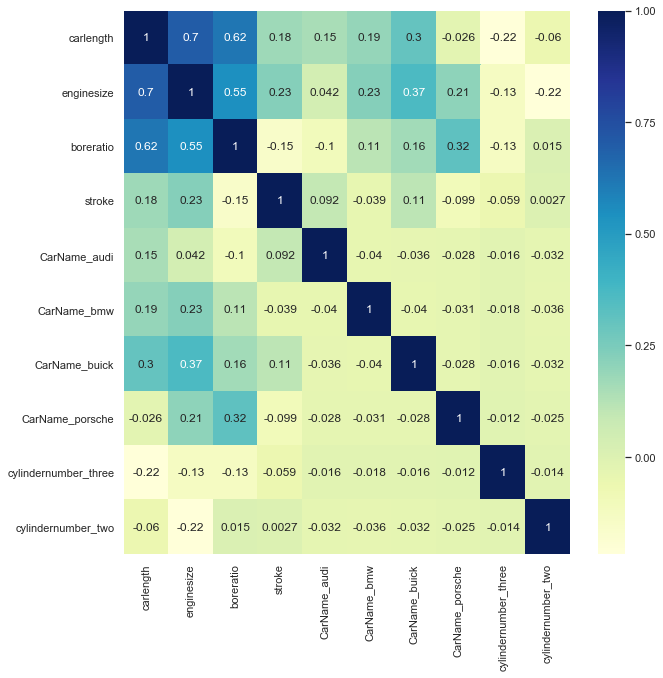

In [42]:
plt.figure(figsize = (10, 10))
sns.set(font_scale=1)
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##  `Model 7 ` 

`stroke` has high p-value, dropping `stroke`

In [43]:
X_train_7 = X_train_6.drop('stroke', 1)

# Add a constant
X_train_7 = sm.add_constant(X_train_7)

# Create Model1
lr7 = sm.OLS(y_train, X_train_7).fit()
print(lr7.params)
print(lr7.summary())

const                  -0.029539
carlength               0.241319
enginesize              0.771476
boreratio              -0.057861
CarName_audi            0.095985
CarName_bmw             0.207897
CarName_buick           0.183490
CarName_porsche         0.294085
cylindernumber_three    0.121018
cylindernumber_two      0.199755
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.5
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           1.71e-62
Time:                        10:07:05   Log-Likelihood:                 198.05
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     133   BIC:                            -346.5
Df Model:              

In [44]:
# Model7 VIF
X_train.drop('stroke', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
0,carlength,3.14
1,enginesize,2.60
2,boreratio,2.19
6,CarName_porsche,1.32
5,CarName_buick,1.18
3,CarName_audi,1.13
8,cylindernumber_two,1.10
4,CarName_bmw,1.07
7,cylindernumber_three,1.06


##  `Model 8 ` 

`boreratio` has high p-value, dropping `boreratio`

In [45]:
X_train_8 = X_train_7.drop('boreratio', 1)

# Add a constant
X_train_8 = sm.add_constant(X_train_8)

# Create Model1
lr8 = sm.OLS(y_train, X_train_8).fit()
print(lr8.params)
print(lr8.summary())

const                  -0.028952
carlength               0.205791
enginesize              0.764459
CarName_audi            0.107365
CarName_bmw             0.209504
CarName_buick           0.186863
CarName_porsche         0.270980
cylindernumber_three    0.118562
cylindernumber_two      0.195040
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           3.47e-63
Time:                        10:07:05   Log-Likelihood:                 197.03
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     134   BIC:                            -349.4
Df Model:                           8                   

In [46]:
# Model8 VIF
X_train.drop('boreratio', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
1,enginesize,2.57
0,carlength,2.30
4,CarName_buick,1.17
5,CarName_porsche,1.12
7,cylindernumber_two,1.09
3,CarName_bmw,1.06
6,cylindernumber_three,1.06
2,CarName_audi,1.03


##  `Model 9 ` 

`cylindernumber_three` has high p-value, dropping `cylindernumber_three`

In [47]:
X_train_9 = X_train_8.drop('cylindernumber_three', 1)

# Add a constant
X_train_9 = sm.add_constant(X_train_9)

# Create Model1
lr9 = sm.OLS(y_train, X_train_9).fit()
print(lr9.params)
print(lr9.summary())

const                -0.028386
carlength             0.192048
enginesize            0.765958
CarName_audi          0.108698
CarName_bmw           0.210949
CarName_buick         0.189845
CarName_porsche       0.269507
cylindernumber_two    0.193746
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           1.32e-63
Time:                        10:07:05   Log-Likelihood:                 195.27
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     135   BIC:                            -350.8
Df Model:                           7                                         
Covariance Type:          

In [48]:
# Model9 VIF
X_train.drop('cylindernumber_three', axis =1, inplace = True)
calculate_VIF(X_train)

,Features,VIF
1,enginesize,2.57
0,carlength,2.22
4,CarName_buick,1.17
5,CarName_porsche,1.12
6,cylindernumber_two,1.09
3,CarName_bmw,1.06
2,CarName_audi,1.03


### all the p-value are zero and VIF are below 3, we will predict on this model

## Step 6: Residual Analysis of the train data

In [49]:
y_train_price = lr9.predict(X_train_9)

Text(0.5, 0, 'Errors')

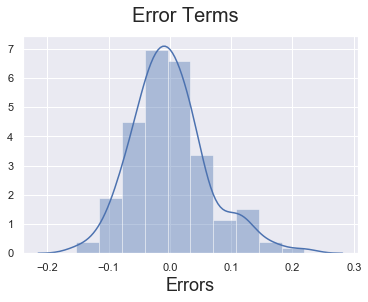

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [51]:
X_train.columns

Index(['carlength', 'enginesize', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_porsche', 'cylindernumber_two'],
      dtype='object')

In [52]:
X_test_m9 =  X_test[['carlength', 'enginesize', 'CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_porsche', 'cylindernumber_two']]
X_test_m9.head()


,carlength,enginesize,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,cylindernumber_two
160,-0.115661,-0.109084,0,0,0,0,0
186,-0.035064,-0.067575,0,0,0,0,0
59,0.055981,-0.018518,0,0,0,0,0
165,-0.079840,-0.109084,0,0,0,0,0
140,-0.249989,-0.071348,0,0,0,0,0


In [53]:
# Adding  constant variable to test dataframe
X_test_m9 = sm.add_constant(X_test_m9)

y_pred_m9 = lr9.predict(X_test_m9)

## Step 8: Model Evaluation

Text(0, 0.5, 'Car Price')

<Figure size 432x288 with 0 Axes>

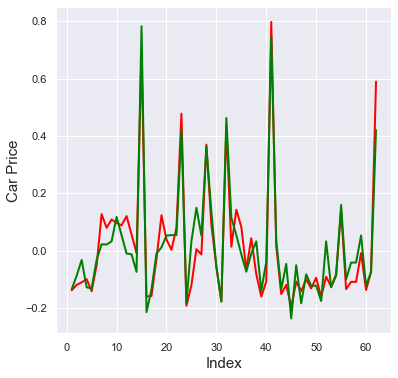

In [54]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]

fig = plt.figure()
plt.figure(figsize = (6, 6))

plt.plot(c,y_test, color="red", linewidth=2, linestyle="-")     
plt.plot(c,y_pred_m9, color="green",  linewidth=2, linestyle="-")  

fig.suptitle('Actual vs Predicted', fontsize=15)              

plt.xlabel('Index', fontsize=15)                              
plt.ylabel('Car Price', fontsize=15)  

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

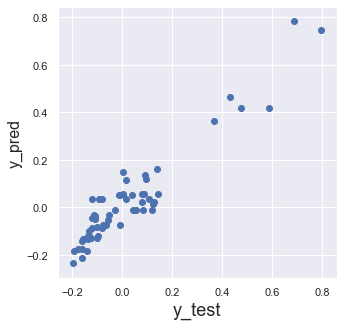

In [55]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize = (5,5))
plt.scatter(y_test,y_pred_m9)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

## Step 9: R-squared score on the test set.

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m9)

0.9015238942496355

The R-squared score indicates `Good Fit`

`Train = .90`

`Test = 0.898 = 0.90`


### Conclusion

Variables with Car Attributes and Car Companies that should be considered while setting the price of a car in a new Region.

`carlength`, `enginesize`,  `cylindernumber_two`, `CarName_audi`, `CarName_bmw`,`CarName_buick`, `CarName_porsche`,